## Load Data from CSVs

In [1]:
import unicodecsv

## Longer version of code (replaced with shorter, equivalent version below)

# enrollments = []
# f = open('enrollments.csv', 'rb')
# reader = unicodecsv.DictReader(f)
# for row in reader:
#     enrollments.append(row)
# f.close()

def read_csv(filename):
    with open(filename, 'rb') as f:
        reader = unicodecsv.DictReader(f)
        return list(reader)
titanic_data = read_csv('/Users/dgcagigas/Documents/DataAnalyzer/P2/titanic-data.csv')
print titanic_data[0]


    

{u'Fare': u'7.25', u'Name': u'Braund, Mr. Owen Harris', u'Embarked': u'S', u'Age': u'22', u'Parch': u'0', u'Pclass': u'3', u'Sex': u'male', u'Survived': u'0', u'SibSp': u'1', u'PassengerId': u'1', u'Ticket': u'A/5 21171', u'Cabin': u''}


## Fixing Data Types

In [18]:
from datetime import datetime as dt

# Takes a date as a string, and returns a Python datetime object. 
# If there is no date given, returns None
def parse_date(date):
    if date == '':
        return None
    else:
        return dt.strptime(date, '%Y-%m-%d')
    
def parse_maybe_int(i):
    if i == '' or i == None:
        return None
    else:
        return int(i)

def parse_maybe_string(i):
    if i == '' or i == None:
        return None
    else:
        return str(i)
def parse_port(i):
    if i == 'S':
        return 'Southampton'
    elif i == 'C':
        return 'Cherbourg'
    elif i == 'Q':
        return 'Queenstown'
    else:
        return None

# Clean up the data types in the enrollments table
for data in titanic_data:
    data['PassengerId'] = parse_maybe_int(data['PassengerId'])
    data['Survived'] = data['Survived'] != '0'
    data['Pclass'] = parse_maybe_int(data['Pclass'])
    data['Name'] = parse_maybe_string(data['Name']) 
    data['Sex'] = parse_maybe_string(data['Sex']) 
    data['Age'] = parse_maybe_float(data['Age']) # Es gibt ein float Alt
    data['SibSp'] = parse_maybe_int(data['SibSp']) # Number of Siblings/Spouses Aboard
    data['Parch'] = parse_maybe_int(data['Parch']) # Number of Parents/Children Aboard
    data['Ticket'] = parse_maybe_string(data['Ticket']) # Ticket number
    data['Fare'] = parse_maybe_float(data['Fare']) # Passenger Fare
    data['Cabin'] = parse_maybe_string(data['Cabin']) # Cabin
    data['Embarked'] = parse_port(data['Embarked']) # Port of Embarkation
titanic_data[1]

{u'Age': 38.0,
 u'Cabin': 'C85',
 u'Embarked': None,
 u'Fare': 71.2833,
 u'Name': 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
 u'Parch': 0,
 u'PassengerId': 2,
 u'Pclass': 1,
 u'Sex': 'female',
 u'SibSp': 1,
 u'Survived': True,
 u'Ticket': 'PC 17599'}

## Investigating the Data

As usual I will divide the Data Analysis Process in 5 parts: Questions, Wrangle, Explore, Draw Conclusions and Communicate. We will analyze Titanic Dataset.

### 1. Questions
These are the questions we are going to focus in the analysis. From my point of view, the most interesting questions are related to whether the passenger had survived or not. But I have added other questions as well.

The fact of being alone aboard, makes easy to survive?
Old people (> 65yo) or children (< 15yo) were likely to survive?
Did it make any different to belong to different classes? or Sex?
How many children lost their parents?
Is the embarked port related to the age? or to the class?

## 2. Data Analysis

In [95]:
import pandas as pd # Importing libraries
import numpy as np

In [96]:
titanic_df = pd.read_csv('/Users/dgcagigas/Documents/DataAnalyzer/P2/titanic-data.csv') # Read csv

First of all, we will see our dataset and a summary.

In [97]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [98]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [99]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,NaN,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,NaN,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,NaN,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Using panda function, describe() and info(), we can see that the only strange data is some missing values in the age, embarked and Cabin. We will delete that passengers when we analyze that values. 

In [100]:
titanic2_df = titanic_df.drop(['Name', 'PassengerId', 'Ticket', 'Cabin'], axis=1)

### The fact of being alone aboard, makes easy to survive?

In [101]:
titanic2_df['isAlone']= pd.Series((titanic_df.SibSp == 0) & (titanic_df.Parch == 0)) ## Adding column

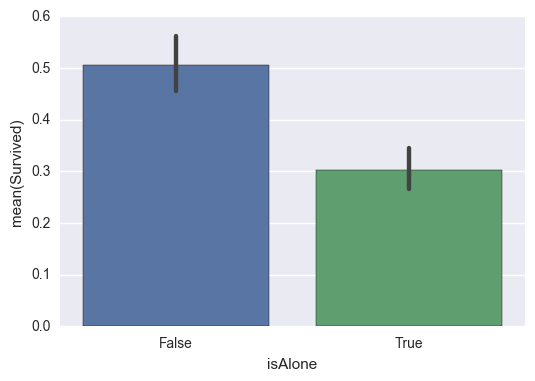

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.barplot(data = titanic2_df, x = 'isAlone', y = 'Survived')
sns.plt.show()

### Old people (> 65yo) or children (< 15yo) were likely to survive?


In [139]:
titanic2_df = titanic2_df[titanic2_df.Age.notnull()]# Change NaN by 0
titanic2_df['isOld'] = pd.Series(titanic2_df.Age > 65)
titanic2_df['isYoung'] = pd.Series((titanic2_df.Age < 15) & (titanic2_df.Age > 0))


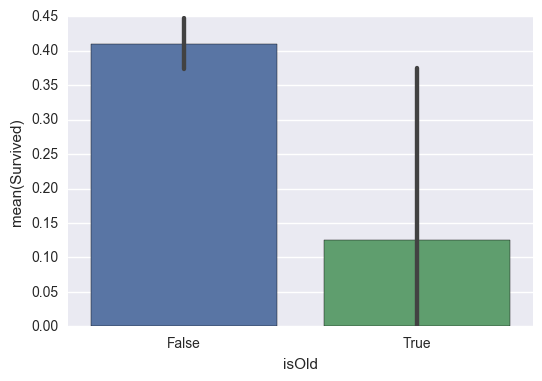

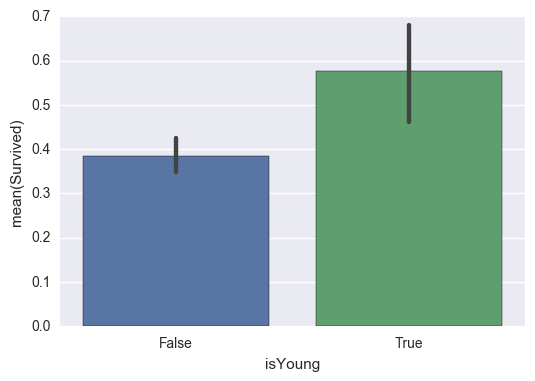

In [140]:
sns.barplot(data = titanic2_df, x = 'isOld', y = 'Survived')
sns.plt.show()
sns.barplot(data = titanic2_df, x = 'isYoung', y = 'Survived')
sns.plt.show()

### Did it make any different to belong to different classes? or Sex?

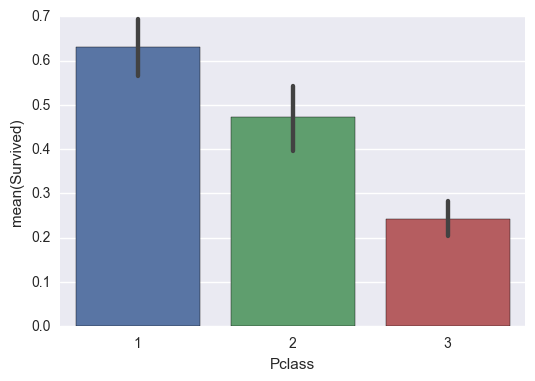

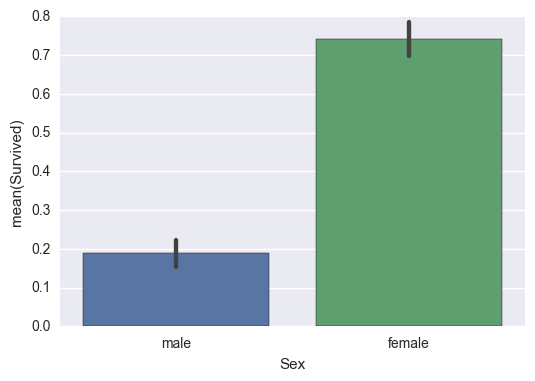

In [107]:
sns.barplot(data = titanic2_df, x = 'Pclass', y = 'Survived')
sns.plt.show()
sns.barplot(data = titanic2_df, x = 'Sex', y = 'Survived')
sns.plt.show()

### How many parents lost their children in the Titanic (they might have died too)?

In [108]:
Children = titanic2_df[titanic2_df.isYoung]
titanic2_df.iloc[2]# 
titanic2_df.loc['Age']# Just a column
titanic2_df.values.mean()# Para la media

In [128]:
ChildrenPa = Children[Children.Parch > 0] # Children with parents aboard
ChildrenPaSu = ChildrenPa[ChildrenPa.Survived == 0] # Children deaths with parents aboard
print '%d Children died with their parents aboard.' % len(ChildrenPaSu)


30 Children died with their parents aboard.


### Is the embarked port related to the age? or to the class?

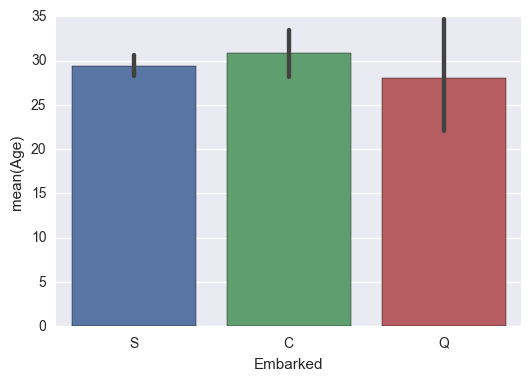

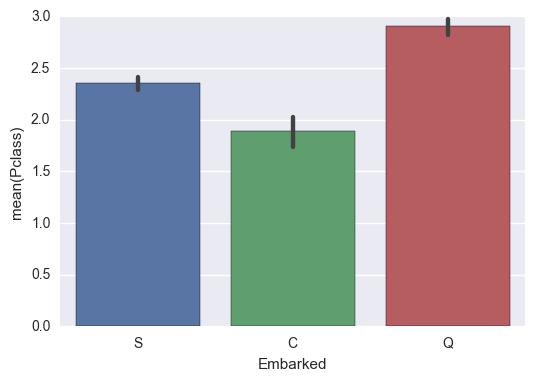

In [130]:
sns.barplot(data = titanic2_df, x = 'Embarked', y = 'Age')
sns.plt.show()
sns.barplot(data = titanic2_df, x = 'Embarked', y = 'Pclass')
sns.plt.show()

In [ ]:
### Best age to survive?

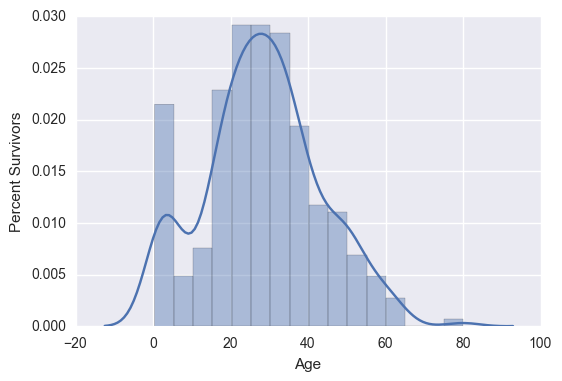

In [138]:
ax = sns.distplot(titanic2_df[titanic2_df.Survived == 1].Age)
ax.set(xlabel='Age', ylabel='Percent Survivors')

sns.plt.show()